In [1]:
%matplotlib inline 
%load_ext autoreload 
%autoreload 2

In [5]:
import xarray as xr
import matplotlib.pylab as plt
import cartopy.crs as ccrs


In [33]:
ds = xr.open_dataset("/Users/haas/africa-lr.nc")
dsnew = ds.groupby("time.year").sum(dim="time", skipna=False)
dsnew


<xarray.Dataset>
Dimensions:      (lat: 160, lon: 160, year: 5)
Coordinates:
  * lat          (lat) float64 -39.75 -39.25 -38.75 -38.25 ... 38.75 39.25 39.75
  * lon          (lon) float64 -19.75 -19.25 -18.75 -18.25 ... 58.75 59.25 59.75
  * year         (year) int64 2000 2001 2002 2003 2004
Data variables:
    dN_n2o_emis  (year, lat, lon) float64 nan nan nan nan ... nan nan nan nan

<xarray.Dataset>
Dimensions:      (lat: 160, lon: 160, year: 5)
Coordinates:
  * lat          (lat) float64 -39.75 -39.25 -38.75 -38.25 ... 38.75 39.25 39.75
  * lon          (lon) float64 -19.75 -19.25 -18.75 -18.25 ... 58.75 59.25 59.75
  * year         (year) int64 2000 2001 2002 2003 2004
Data variables:
    dN_n2o_emis  (year, lat, lon) float64 nan nan nan nan ... nan nan nan nan

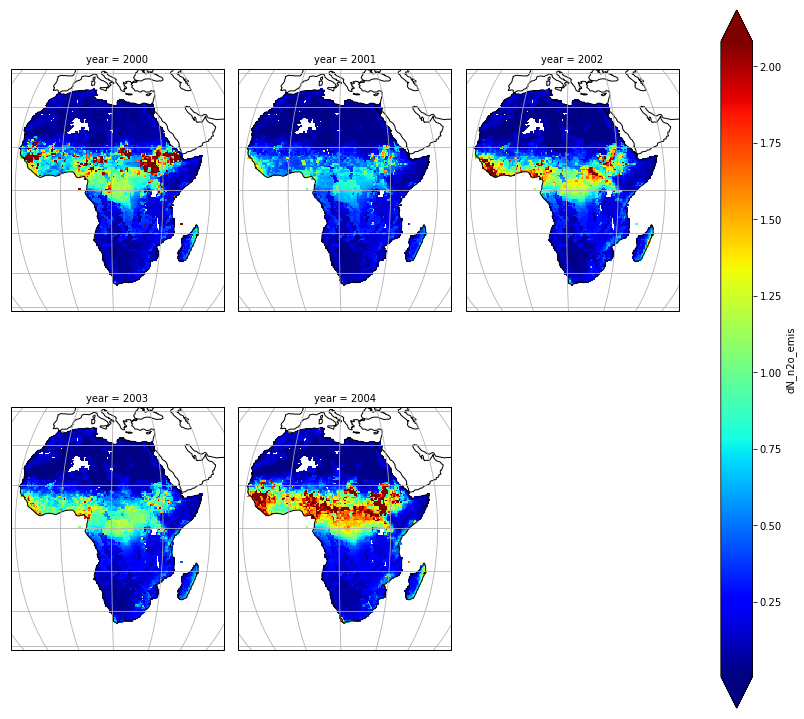

In [34]:

p=dsnew.dN_n2o_emis.plot( x="lon",y="lat", transform=ccrs.PlateCarree(), 
                       subplot_kws={'projection':ccrs.Orthographic(20,0)},
                       #subplot_kws={'projection':ccrs.Sinusoidal(20,0)},
                       col="year", 
                       col_wrap=3, 
                       figsize=(12,10), 
                       robust=True, 
                       cmap="jet")

                       
for ax in p.axes.flat: 
    ax.coastlines()
    ax.gridlines()
    ax.set_extent([-20,60,-40,40])
    
#plt.title("N2O in Africa")

In [37]:
dsnew.to_netcdf("/Users/haas/africa-lr_yearly.nc")